In [76]:
from cobra.sampling import ACHRSampler
from cobra.sampling import OptGPSampler
import cobra
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import statsmodels
from scipy.stats import sem, t
from scipy import mean
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from scipy.stats import hypergeom


%matplotlib inline

In [77]:
cd "C:/Users/Piyush/Codes/Flux Sampling and Differential Flux Analysis"

C:\Users\Piyush\Codes\Flux Sampling and Differential Flux Analysis


In [78]:
subs=pd.read_csv('ReactionSetNHBE.csv')

In [79]:
dataset=pd.DataFrame()
for path in subs['Var2'].unique():
    reaction_set=subs.loc[subs['Var2']==path,'Var1']
    rxn=reaction_set.reset_index(drop=True)
    df_temp=pd.DataFrame({path:rxn})
    dataset=pd.concat([dataset,df_temp],axis=1)

In [80]:
# dataset.to_csv('ReactionSetStructuredNHBE.csv')

In [81]:
cd "D:/COVID19/Manuscript/Final_PNAS/Codes/Flux Sampling and Differential Flux Analysis"

D:\COVID19\Manuscript\Final_PNAS\Codes\Flux Sampling and Differential Flux Analysis


In [82]:
rxnlist=pd.read_csv('ImpactedReactionsNHBE.csv')

In [83]:
listSize=len(rxnlist)
listrxnSize=[]
setSize=[]
FCvals=[]
rxnNames=[]
rxnSize=7196

for col in dataset.columns:
    df=pd.DataFrame({'Reaction':dataset[col]})
    out=df.merge(rxnlist)
    FCvals.append(out['FC'])
    rxnNames.append(out['Reaction'])
    listrxnSize.append(len(out))
    setSize.append(len(dataset[col].dropna()))

hyperdata=pd.DataFrame({'Pathways':dataset.columns,'ListReactions':listrxnSize,'SetSize':setSize,'FCValues':FCvals,'Reactions':rxnNames})
    

In [84]:
hyperdata

,Pathways,ListReactions,SetSize,FCValues,Reactions
0,Transport reactions,273,2028,0 1.000000 1 1.133239 2 -1...,0 3DHLCAabc 1 ...
1,Eicosanoid metabolism,1,14,"0 1.0 Name: FC, dtype: float64","0 HMR_8557 Name: Reaction, dtype: object"
2,"Valine, leucine, and isoleucine metabolism",4,42,0 -1.000000 1 -1.000000 2 -1.000000 3 ...,0 HMR_3208 1 HMR_3213 2 HMR_3215 3 ...
3,Propanoate metabolism,4,13,"0 1.0 1 1.0 2 1.0 3 1.0 Name: FC, ...",0 HMR_0153 1 HMR_3212 2 HMR_4497 3 ...
4,Fatty acid oxidation,71,370,0 1.089815 1 2.309286 2 -0.99203...,0 ARACHCRNt 1 C140CPT1 2 ...
5,Tyrosine metabolism,4,22,0 1.493098 1 -1.489273 2 -0.999995 3 ...,0 HMR_3935 1 HMR_8530 2 NADPQNOXR 3...
6,Ubiquinone synthesis,0,9,"Series([], Name: FC, dtype: float64)","Series([], Name: Reaction, dtype: object)"
7,Bile acid biosynthesis,2,81,"0 1.0 1 -1.0 Name: FC, dtype: float64","0 HC02196te 1 HMR_3908 Name: Reaction, ..."
8,Drug metabolism,1,41,"0 1.0 Name: FC, dtype: float64","0 3HPVSteb Name: Reaction, dtype: object"
9,Starch and sucrose metabolism,0,23,"Series([], Name: FC, dtype: float64)","Series([], Name: Reaction, dtype: object)"


In [85]:
hits=hyperdata['ListReactions']
pool=hyperdata['SetSize']
allrxns=hyperdata['SetSize'].sum()
targetrxns=hyperdata['ListReactions'].sum()

In [86]:
pvalList=[]
for h,p in zip(hits,pool):
    rv=hypergeom(allrxns-p,p,targetrxns)
    pval=rv.pmf(h)
    pvalList.append(pval)

hyperdata['P-value']=pvalList
reject,padj,_,_=statsmodels.stats.multitest.multipletests(hyperdata['P-value'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
hyperdata['P-valueadj']=padj
hyperdata['Reject']=reject

In [87]:
hyperdata.sort_values(by='ListReactions',ascending=False)

,Pathways,ListReactions,SetSize,FCValues,Reactions,P-value,P-valueadj,Reject
0,Transport reactions,273,2028,0 1.000000 1 1.133239 2 -1...,0 3DHLCAabc 1 ...,2.115104e-06,2.595809e-05,True
4,Fatty acid oxidation,71,370,0 1.089815 1 2.309286 2 -0.99203...,0 ARACHCRNt 1 C140CPT1 2 ...,2.721740e-05,2.624535e-04,True
20,Exchange/demand reactions,41,790,0 1.000000 1 -0.822794 2 -1.000000 3...,0 EX_CE7096[e] 1 EX_M00265[e] ...,4.775790e-15,2.149106e-13,True
93,Nucleotide metabolism,37,109,0 1.012163 1 -2.449237 2 1.00000...,0 HMR_3967 1 HMR_4024 2 HMR_4180 3...,6.922809e-10,1.557632e-08,True
30,Carnitine shuttle (mitochondrial),33,109,0 5.188409 1 -5.237386 2 0.83...,0 HMR_2603 1 HMR_2604 2 HMR_2609 3...,1.236542e-07,1.669331e-06,True
79,Beta oxidation of unsaturated fatty acids (n-9...,24,38,0 1.0 1 1.0 2 1.0 3 1.0 4 ...,0 HMR_3330 1 HMR_3331 2 HMR_3332 3...,5.955732e-14,2.010060e-12,True
31,Fatty acid activation (cytosolic),23,59,0 2.525706 1 -1.000000 2 1.190466 3...,0 HMR_0192 1 HMR_0200 2 HMR_0209 3...,5.599091e-08,8.398637e-07,True
48,Cholesterol biosynthesis 1 (Bloch pathway),19,27,0 0.877193 1 0.884726 2 0.900391 3...,0 HMR_1477 1 HMR_1478 2 HMR_1479 3...,1.386397e-12,3.743272e-11,True
77,Beta oxidation of di-unsaturated fatty acids (...,18,19,0 -1.0 1 -1.0 2 -1.0 3 -1.0 4 -...,0 HMR_3275 1 HMR_3277 2 HMR_3278 3...,2.377427e-16,3.209527e-14,True
29,Carnitine shuttle (cytosolic),18,55,0 -1.000000 1 5.134790 2 2.320388 3...,0 HMR_2599 1 HMR_2602 2 HMR_2608 3...,2.371790e-05,2.463012e-04,True


In [88]:
hyperdata_sig=hyperdata[(hyperdata['Reject']) & (hyperdata['ListReactions']!=0)]
hyperdata_sorted=hyperdata_sig.sort_values(by='P-valueadj',ascending=False)

In [89]:
cd "D:/COVID19/Manuscript/Final_PNAS/Codes/PPI and Phosphoproteome"

D:\COVID19\Manuscript\Final_PNAS\Codes\PPI and Phosphoproteome


In [90]:
phosRxns=pd.read_csv('PhosReactions.csv')
ppiRxns=pd.read_csv('PPIReactions.csv')
phosRxns.columns=['Reaction']
ppiRxns.columns=['Reaction']

In [91]:
listSize=len(phosRxns)
listrxnSize_phos=[]
setSize=[]
FCvals=[]


for col in dataset.columns:
    df=pd.DataFrame({'Reaction':dataset[col]})
    out=df.merge(phosRxns)
    listrxnSize_phos.append(len(out))
    
listSize=len(ppiRxns)
listrxnSize_ppi=[]
setSize=[]
FCvals=[]

    
for col in dataset.columns:
    df=pd.DataFrame({'Reaction':dataset[col]})
    out=df.merge(ppiRxns)
    listrxnSize_ppi.append(len(out))
    
phos_pathways=pd.DataFrame({'Pathways':dataset.columns,'PhosList':listrxnSize_phos})
ppi_pathways=pd.DataFrame({'Pathways':dataset.columns,'PPIList':listrxnSize_ppi})

In [92]:
pd.set_option('display.max_rows', 500)


In [93]:
ppi_pathways.sort_values(by='PPIList',ascending=False)

,Pathways,PPIList
123,Keratan sulfate degradation,24
4,Fatty acid oxidation,19
90,Folate metabolism,18
0,Transport reactions,14
18,N-glycan metabolism,7
124,Chondroitin sulfate degradation,5
119,Glycosylphosphatidylinositol (GPI)-anchor bios...,4
81,Beta oxidation of phytanic acid (peroxisomal),3
74,Beta oxidation of odd-chain fatty acids (mitoc...,3
12,Sphingolipid metabolism,3


In [94]:
hyperdata_sorted

,Pathways,ListReactions,SetSize,FCValues,Reactions,P-value,P-valueadj,Reject
12,Sphingolipid metabolism,5,99,0 -1.0 1 -1.0 2 1.0 3 1.0 4 -1.0 N...,0 HMR_0750 1 HMR_0754 2 HMR_0760 3 ...,1.174846e-02,4.664831e-02,True
68,Fatty acid activation (endoplasmic reticular),1,55,"0 1.0 Name: FC, dtype: float64","0 HMR_2982 Name: Reaction, dtype: object",7.427788e-03,3.234682e-02,True
28,Acyl-CoA hydrolysis,14,61,0 -1.0 1 -1.0 2 -1.0 3 1.0 4 ...,0 HMR_0193 1 HMR_0201 2 HMR_0210 3...,5.938818e-03,2.764622e-02,True
40,Arachidonic acid metabolism,4,98,"0 1.0 1 1.0 2 1.0 3 1.0 Name: FC, ...",0 HMR_0958 1 HMR_0959 2 HMR_0960 3 ...,4.979656e-03,2.400905e-02,True
7,Bile acid biosynthesis,2,81,"0 1.0 1 -1.0 Name: FC, dtype: float64","0 HC02196te 1 HMR_3908 Name: Reaction, ...",2.151570e-03,1.161848e-02,True
101,"Phenylalanine, tyrosine and tryptophan biosynt...",1,70,"0 1.0 Name: FC, dtype: float64","0 HMR_6817 Name: Reaction, dtype: object",1.403671e-03,8.238941e-03,True
32,Glycerolipid metabolism,1,72,"0 -1.0 Name: FC, dtype: float64","0 HMR_0675 Name: Reaction, dtype: object",1.118489e-03,6.863453e-03,True
128,C5-branched dibasic acid metabolism,4,4,0 11.500926 1 11.510890 2 16.020137 3...,0 HMR_8662 1 HMR_8663 2 HMR_8667 3 ...,1.840354e-04,1.363590e-03,True
63,Fatty acid biosynthesis (unsaturated),12,32,0 0.900468 1 0.883968 2 0.880597 3...,0 HMR_2315 1 HMR_2317 2 HMR_2319 3...,1.196239e-04,9.499546e-04,True
70,Beta oxidation of even-chain fatty acids (pero...,16,48,0 1.000000 1 1.000000 2 1.000000 3...,0 HMR_3057 1 HMR_3058 2 HMR_3059 3...,5.048612e-05,4.543751e-04,True


In [95]:
hyperdata_sorted=hyperdata_sorted.drop([0,20],axis=0)

In [96]:
hyperdata_phos=hyperdata_sorted.merge(phos_pathways,on='Pathways')
hyperdata_ppi_phos=hyperdata_phos.merge(ppi_pathways,on='Pathways')

In [97]:
# hyperdata_ppi_phos.to_csv('AffectedReactions_PPI_Phos.csv')

In [98]:
hyperdata_ppi_phos['SumEffects']=hyperdata_ppi_phos['PPIList']+hyperdata_ppi_phos['PhosList']

In [99]:
hyperdata_ppi_phos=hyperdata_ppi_phos.sort_values(by='SumEffects',ascending=False)

In [100]:
hyperdata_ppi_phos.to_csv('Affected_Modules_SARSCov2.csv')

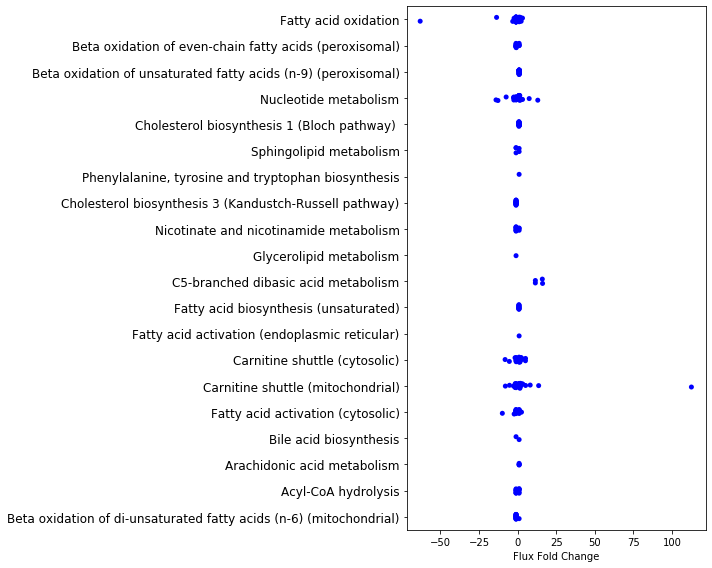

In [104]:
#StripPlot

dum=pd.DataFrame()

for i in hyperdata_ppi_phos['FCValues'].index:
    dum=dum.append(hyperdata_ppi_phos['FCValues'][i])

dum=dum.transpose()
arr=np.array(dum)

plt.style.use('seaborn-bright')
plt.figure(figsize=(10,8))

sns.stripplot(data=arr,color='blue',orient='h',jitter=0.1)

plt.yticks(np.arange(0,len(hyperdata_ppi_phos)),labels=hyperdata_ppi_phos['Pathways'],rotation=0,fontsize=12)
plt.xlabel('Flux Fold Change')
plt.tight_layout()
plt.savefig('Figure4BL.png',dpi=600)

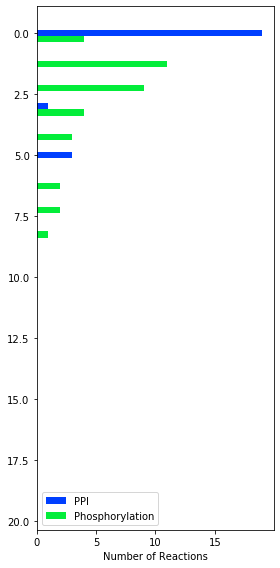

In [105]:
plt.figure(figsize=(4,8))
plt.barh(np.arange(0,len(hyperdata_ppi_phos)),hyperdata_ppi_phos['PPIList'],0.25)
plt.barh(np.arange(0,len(hyperdata_ppi_phos))+0.25,hyperdata_ppi_phos['PhosList'],0.25)
plt.gca().invert_yaxis()
plt.xlabel('Number of Reactions')
plt.legend(['PPI','Phosphorylation'])
plt.tight_layout()
plt.savefig('Figure4BR.png',dpi=600)